In [1]:
import numpy as np
import pandas as pd

In [2]:
import rdkit
rdkit.__version__

'2020.09.5'

In [3]:
from rdkit import DataStructs

from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools

# Monkey patch a few RDkit methods of Chem.Mol
PandasTools.InstallPandasTools()

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("CDK2_clean.csv")

In [6]:
df

,pdbid,compound,SMILES,series,Kd,unit,pdbid.1,ligid
0,4EK4,CS1,Brc1ccc(cc1)C(=O)Nc1n[nH]c(c1)C CS1,1,33200.0,nM,4EK4,1CK
1,4EK5,CS3,O=C(Nc1n[nH]c(c1)C1CC1)c1ccc(cc1)C(=O)N CS3,1,808.0,nM,4EK5,03K
2,4FKG,CS4,O=C(Nc1n[nH]c(c1)C1CC1)c1ccc(cc1)C(=O)[O-] CS4,1,21200.0,nM,4FKG,4CK
3,4FKI,CS9,FC(F)(F)Oc1ccc(cc1)CC(=O)Nc1n[nH]c(c1)C1CC1 CS9,1,58300.0,nM,4FKI,09K
4,4FKJ,CS11,O(CC[NH+]1CCCC1)c1ccc(cc1)CC(=O)Nc1[nH]nc(c1)C...,1,280.0,nM,4FKJ,11K
5,3SW4,CS18,s1c(-c2nc(ncc2)Nc2ccc(N(C)C)cc2)c(nc1N)C CS18,2,961.0,nM,3SW4,18K
6,3SW7,CS19,s1c(-c2nc(ncc2)Nc2cc([N+](=O)[O-])c(N(C)C)cc2)...,2,229.0,nM,3SW7,19K
7,4FKO,CS20,Clc1cc(Nc2nc(ccn2)-c2sc(nc2C)C)ccc1N(C)C CS20,2,777.0,nM,4FKO,20K
8,4FKP,CS241,S(=O)(=O)(NC(N)=N)c1ccc(N\C=C/2\c3c(NC\2=O)ccc...,3,287.0,nM,4FKP,LS5
9,4FKQ,CS242,S(=O)(=O)(N)c1ccc(N\N=C/2\c3c(NC\2=O)ccc2[nH]n...,3,528.0,nM,4FKQ,42K


In [7]:
len(df)

16

In [8]:
PandasTools.AddMoleculeColumnToFrame(df, "SMILES", "mol")

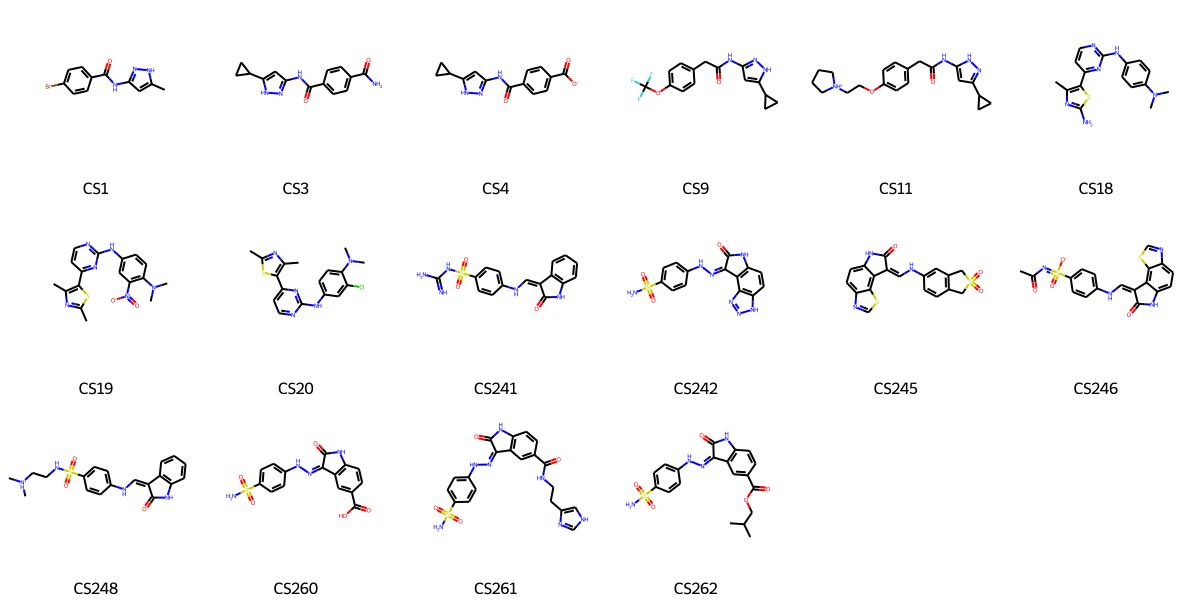

In [9]:
img = PandasTools.FrameToGridImage(df, column="mol", legendsCol="compound", molsPerRow=6, returnPNG=False)
img

In [10]:
img.save("plots/molecules.png")

In [11]:
df["fp"] = df.apply(lambda r: AllChem.GetMorganFingerprintAsBitVect(r.mol, 2, nBits=1024), axis="columns")

In [12]:
n = len(df)

similarity = np.ones((n,n))

for i in range(n):
    for j in range(i):
        similarity[i,j] = similarity[j, i] = DataStructs.FingerprintSimilarity(df.iloc[i].fp, df.iloc[j].fp)

mol,,,,,,,,,,,,,,,,
mol,,,,,,,,,,,,,,,,
,1.000000,0.458333,0.458333,0.262295,0.202899,0.136364,0.183099,0.179104,0.114286,0.128571,0.150685,0.173333,0.125000,0.200000,0.236842,0.191781
,0.458333,1.000000,0.761905,0.472727,0.279412,0.128571,0.157895,0.152778,0.123288,0.185714,0.142857,0.135802,0.075949,0.223881,0.225000,0.197368
,0.458333,0.761905,1.000000,0.472727,0.279412,0.112676,0.173333,0.152778,0.108108,0.169014,0.142857,0.150000,0.089744,0.223881,0.225000,0.197368
,0.262295,0.472727,0.472727,1.000000,0.446154,0.102564,0.130952,0.125000,0.098765,0.139241,0.130952,0.125000,0.108434,0.171053,0.166667,0.180723
,0.202899,0.279412,0.279412,0.446154,1.000000,0.095238,0.134831,0.142857,0.104651,0.090909,0.122222,0.117021,0.101124,0.117647,0.156250,0.130435
,0.136364,0.128571,0.112676,0.102564,0.095238,1.000000,0.524590,0.543860,0.087500,0.113924,0.107143,0.114943,0.084337,0.087500,0.095745,0.090909
,0.183099,0.157895,0.173333,0.130952,0.134831,0.524590,1.000000,0.701754,0.103448,0.127907,0.133333,0.139785,0.125000,0.116279,0.120000,0.117021
,0.179104,0.152778,0.152778,0.125000,0.142857,0.543860,0.701754,1.000000,0.083333,0.108434,0.127907,0.122222,0.105882,0.096386,0.103093,0.098901
,0.114286,0.123288,0.108108,0.098765,0.104651,0.087500,0.103448,0.083333,1.000000,0.263889,0.280000,0.351351,0.631579,0.304348,0.277108,0.285714

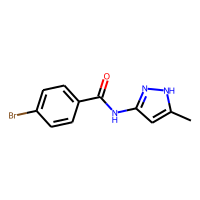
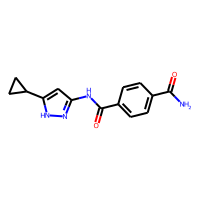
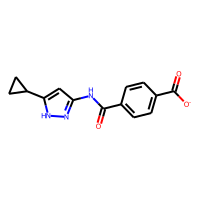
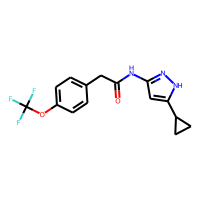
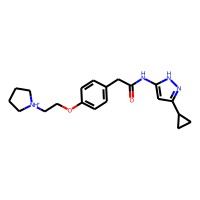
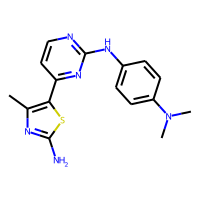
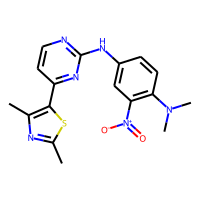
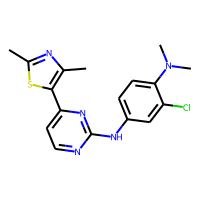
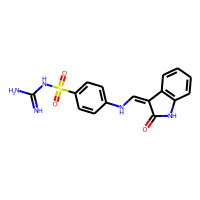
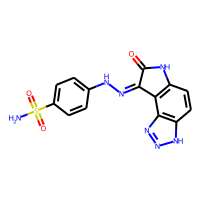
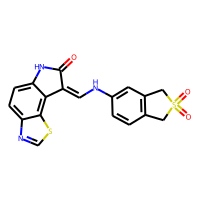
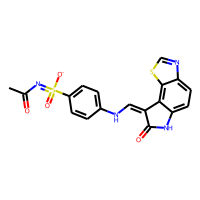
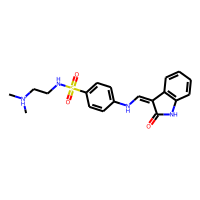
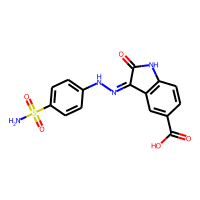
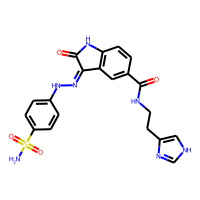
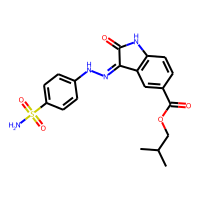
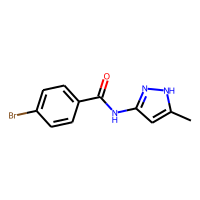
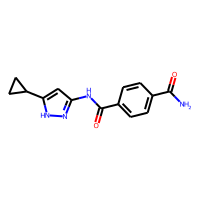
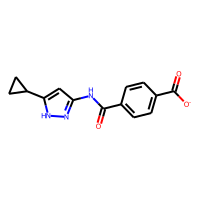
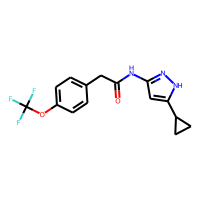
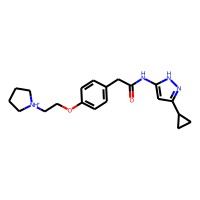
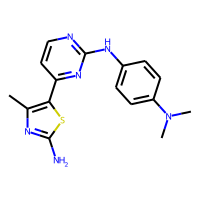
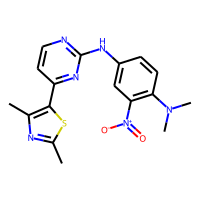
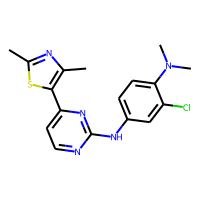
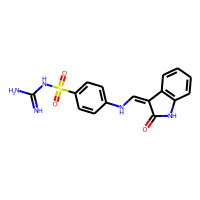
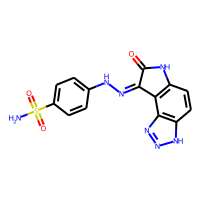
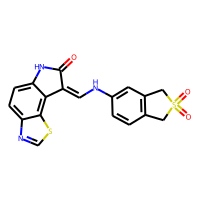
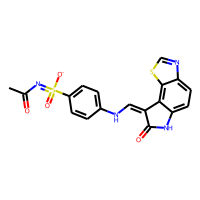
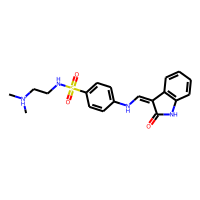
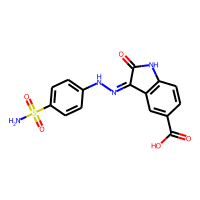
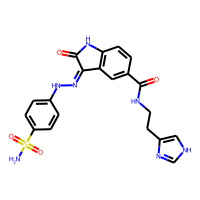
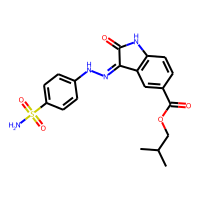

In [13]:
pd.DataFrame(
    similarity,
    columns=df.mol,
    index=df.mol,
    ).style.background_gradient(cmap=sns.cm.rocket, vmin=0, vmax=1)

<AxesSubplot:>

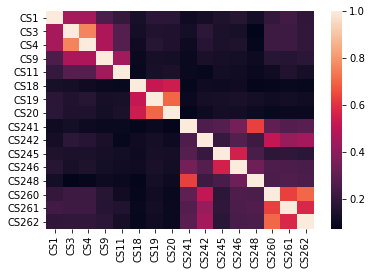

In [14]:
sns.heatmap(similarity, xticklabels=df.compound, yticklabels=df.compound)